In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data_path = r"./data/raw/Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}, dtype: {df[i].dtype}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'], dtype: object
gender: ['Female' 'Male'], dtype: object
SeniorCitizen: [0 1], dtype: int64
Partner: ['Yes' 'No'], dtype: object
Dependents: ['No' 'Yes'], dtype: object
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39], dtype: int64
PhoneService: ['No' 'Yes'], dtype: object
MultipleLines: ['No phone service' 'No' 'Yes'], dtype: object
InternetService: ['DSL' 'Fiber optic' 'No'], dtype: object
OnlineSecurity: ['No' 'Yes' 'No internet service'], dtype: object
OnlineBackup: ['Yes' 'No' 'No internet service'], dtype: object
DeviceProtection: ['No' 'Yes' 'No internet service'], dtype: object
TechSupport: ['No' 'Yes' 'No internet service'], dtype: object
StreamingTV: ['No' 'Yes' 'No internet service'], dtype: object
St

In [6]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## EDA

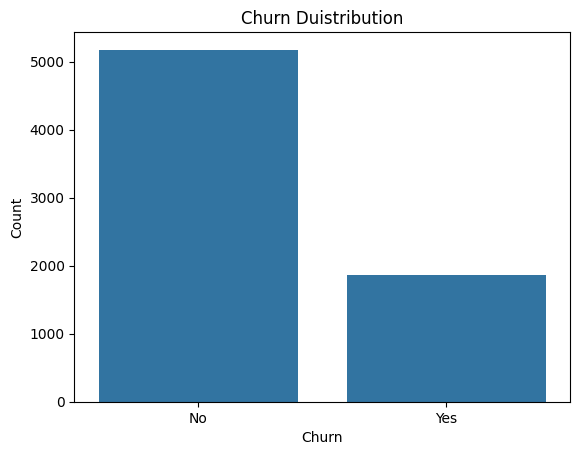

In [11]:
sns.countplot(data = df, x = "Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Duistribution")
plt.show()


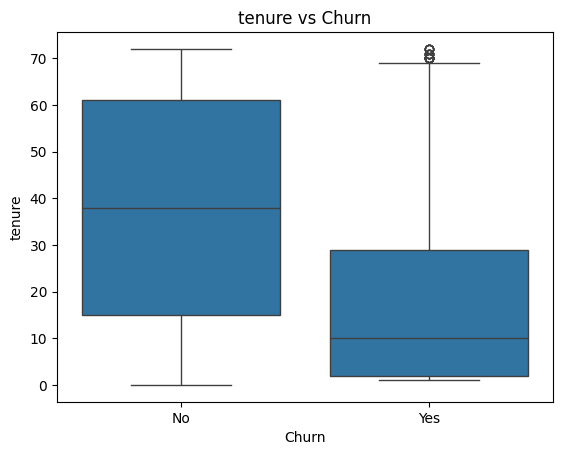

In [12]:
sns.boxplot(data = df, x = "Churn", y = "tenure")
plt.xlabel("Churn")
plt.ylabel("tenure")
plt.title("tenure vs Churn")
plt.show()

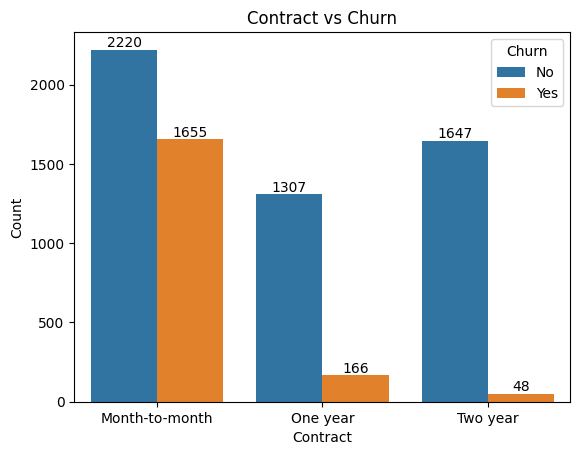

In [13]:
g=sns.countplot(data=df , x='Contract',hue='Churn')
for bars in g.containers:
    g.bar_label(bars)
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Contract vs Churn')
plt.show()

Text(0.5, 1.0, 'MonthlyCharges vs Churn')

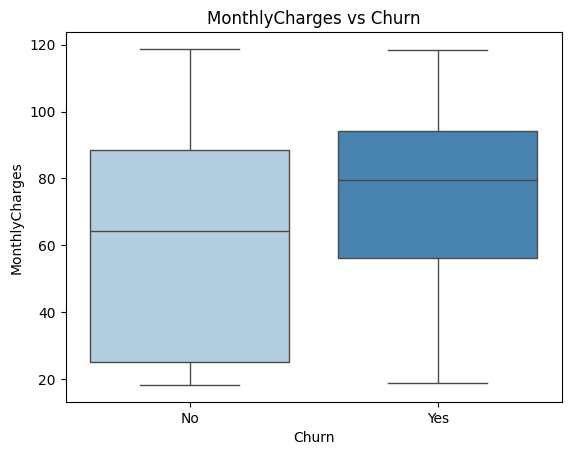

In [14]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges',palette= 'Blues',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('MonthlyCharges vs Churn')

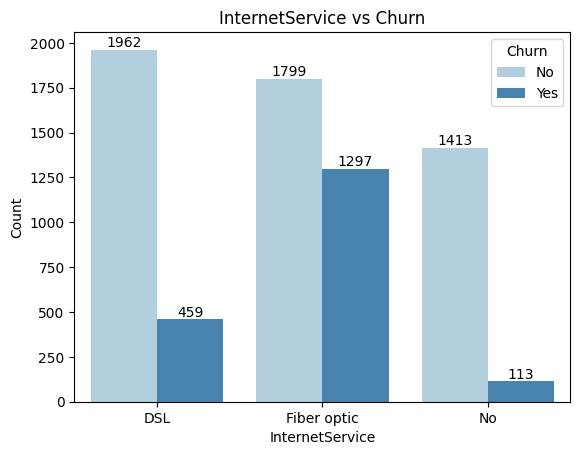

In [15]:
g=sns.countplot(data=df, x='InternetService',palette= 'Blues',hue='Churn')
for bars in g.containers:
    g.bar_label(bars)
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('InternetService vs Churn')
plt.show()

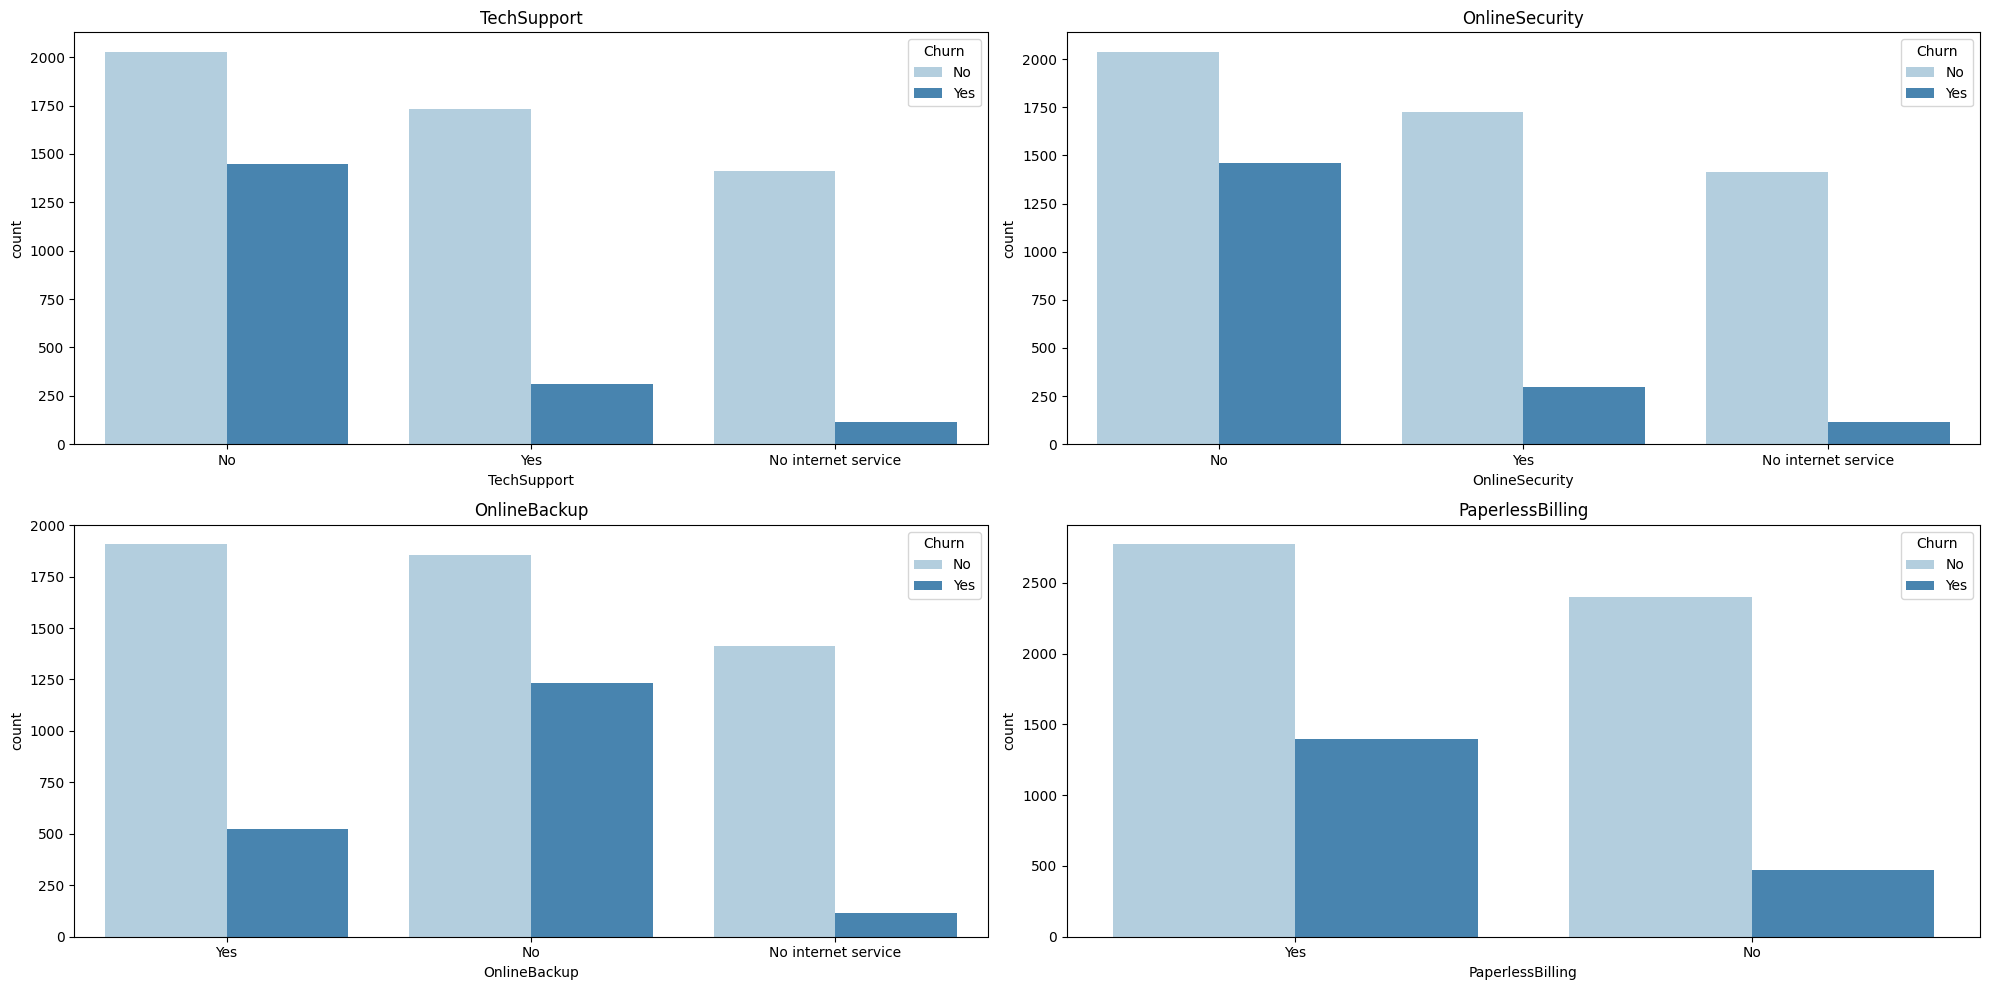

In [16]:
fig , ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(data=df , x='TechSupport',hue='Churn',palette='Blues',ax=ax[0,0])
ax[0,0].set_title('TechSupport')

sns.countplot(data=df , x='OnlineSecurity',hue='Churn',palette='Blues',ax=ax[0,1])
ax[0,1].set_title('OnlineSecurity')

sns.countplot(data=df , x='OnlineBackup',hue='Churn',palette='Blues',ax=ax[1,0])
ax[1,0].set_title('OnlineBackup')


sns.countplot(data=df , x='PaperlessBilling',hue='Churn',palette='Blues',ax=ax[1,1])
ax[1,1].set_title('PaperlessBilling')

plt.tight_layout()
plt.show()


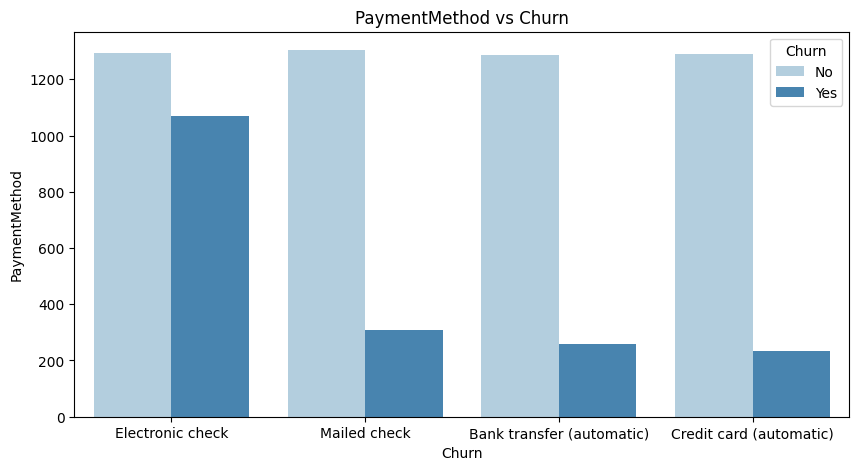

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='PaymentMethod',palette= 'Blues',hue='Churn')
plt.xlabel('Churn')
plt.ylabel('PaymentMethod')
plt.title('PaymentMethod vs Churn')
plt.show()

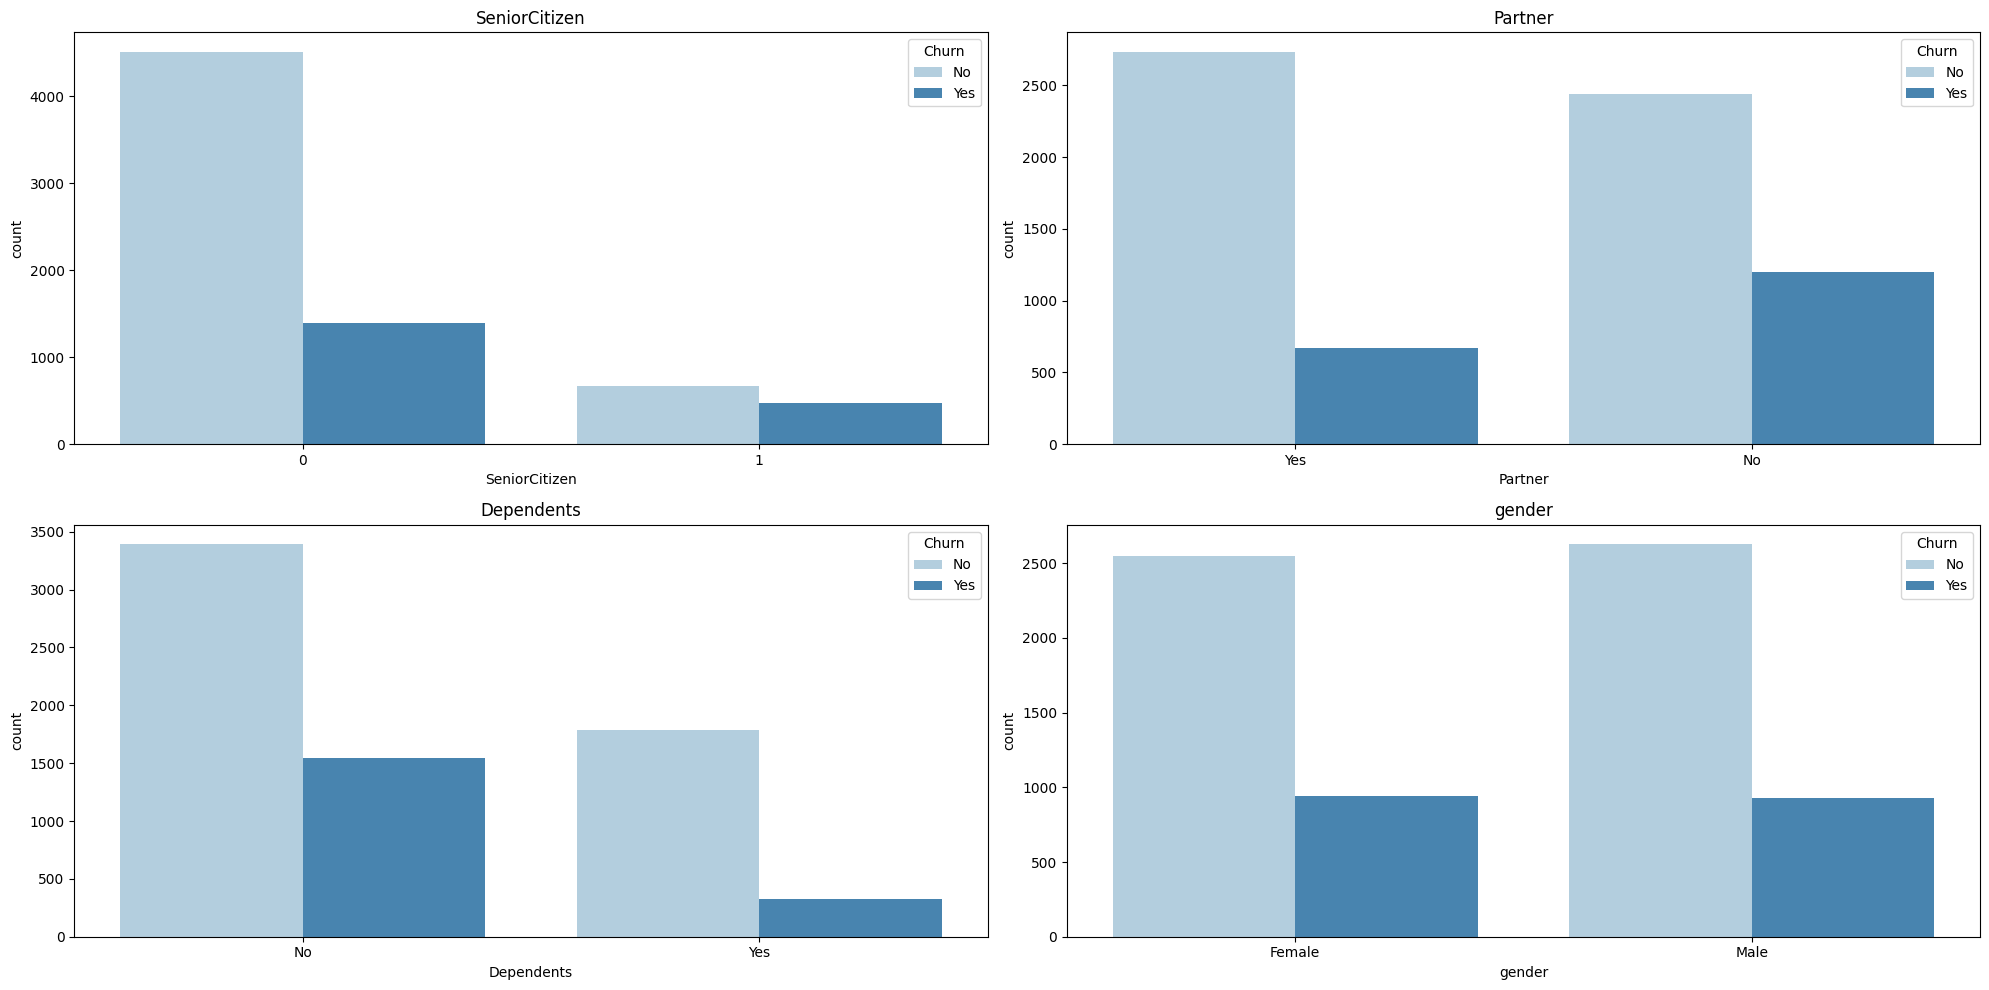

In [18]:
fig , ax = plt.subplots(2,2,figsize=(20,10))

sns.countplot(data=df , x='SeniorCitizen',hue='Churn',palette='Blues',ax=ax[0,0])
ax[0,0].set_title('SeniorCitizen')

sns.countplot(data=df , x='Partner',hue='Churn',palette='Blues',ax=ax[0,1])
ax[0,1].set_title('Partner')

sns.countplot(data=df , x='Dependents',hue='Churn',palette='Blues',ax=ax[1,0])
ax[1,0].set_title('Dependents')

sns.countplot(data=df , x='gender',hue='Churn',palette='Blues',ax=ax[1,1])
ax[1,1].set_title('gender')

plt.tight_layout()
plt.show()

## Feature preprocessing

In [19]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [21]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [22]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [23]:
df.drop(columns=['customerID','gender','PhoneService','MultipleLines'],axis=1,inplace=True)
X = df.drop(columns=['Churn'],axis=1)
y = df['Churn']

In [24]:
X.head(5)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## Feature selection

In [25]:
# Divide data to different categories for better understanding
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges',
             'AverageCharges', 'AboveAverageCharges', 'ServicesMost', 'Churn_Yes']

services = ['MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
            'OnlineBackup_Yes', 'DeviceProtection_Yes','TechSupport_Yes', 'StreamingTV_Yes',
            'StreamingMovies_Yes', 'InternetService_No', 'PhoneService_Yes', 'PaperlessBilling_Yes', 'ServicesMost', 'Churn_Yes']

demographic = ['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'Churn_Yes', 'cluster']

other = ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']

In [26]:
#Missing values
df['TotalCharges'].fillna("mean", inplace = True)

for i in df.columns:
    print(f"{i}: {df[i].dtype}")

#CustomerID
df.drop("customerID", inplace = True)

#gender, Partner
df["gender"].map({"Yes": 1, "No": 0})
df["Partner"].map({"Yes": 1, "No": 0})
df["Dependents"].map({"Yes": 1, "No": 0})
df["PaperlessBilling"].map({"Yes": 1, "No": 0})
df["Churn"].map({"Yes": 1, "No": 0})


C:\Users\priyam.nagar\AppData\Local\Temp\2\ipykernel_11592\3716800967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna("mean", inplace = True)


SeniorCitizen: int64
Partner: object
Dependents: object
tenure: int64
InternetService: object
OnlineSecurity: object
OnlineBackup: object
DeviceProtection: object
TechSupport: object
StreamingTV: object
StreamingMovies: object
Contract: object
PaperlessBilling: object
PaymentMethod: object
MonthlyCharges: float64
TotalCharges: float64
Churn: int64


KeyError: "['customerID'] not found in axis"